<h1 style="font-size:5vw" align='center'><b>Will INDIA cross US Covid count??</b></h1>

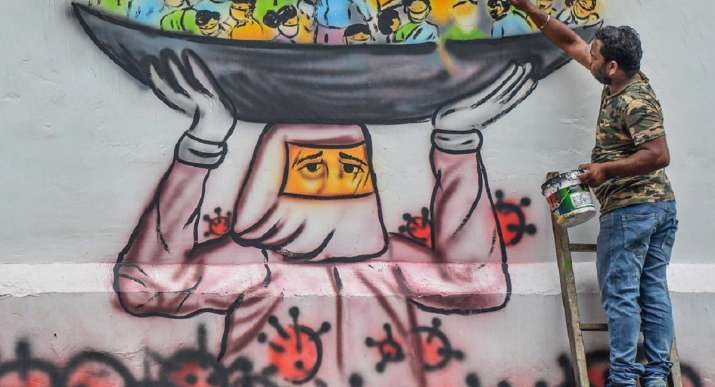

<h3>Understanding the Coronaviruses</h3>

Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans, these viruses cause respiratory tract infections that can range from mild to lethal. Mild illnesses include some cases of the common cold (which is also caused by other viruses, predominantly rhinoviruses), while more lethal varieties can cause SARS, MERS, and COVID-19. Symptoms in other species vary: in chickens, they cause an upper respiratory tract disease, while in cows and pigs they cause diarrhea. For now, there are no vaccines or antiviral drugs to prevent or treat human coronavirus infections.

<a href="https://en.wikipedia.org/wiki/Coronavirus" target="_blank">Source of information</a>

<a id='section_id1'><br><h2> Import libraries/data files</h2></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from datetime import date 
import datetime

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#US Cases
us_cases = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

#India Cases
case_time_series=pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')

In [ ]:
case_time_series['Date']=pd.to_datetime(case_time_series['Date']+'20', format='%d %B %y')
case_time_series.info()

In [ ]:
temp=us_cases.groupby('date')
us_cases_final=temp[['cases','date']].sum()
us_cases_final.reset_index(level=0, inplace=True)
us_cases_final['date']=pd.to_datetime(us_cases_final['date'])

<a id='section_id2'><br><h2>US Total Covid Cases statistics:</h2></a>

In [ ]:
us_cases.head()

<a id='section_id2'><br><h2>Covid Cases Growth in US and India.</h2></a>

As of today, US has the maximum number of Covid Cases in the World. However, by looking at the below graph, the growth rate of India is comparitively steep as compared to US.
Hence, with this graph, it looks like India will cross the US in terms of total Covid Cases.

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(us_cases_final.index,us_cases_final['cases'], label = 'US')
plt.plot(case_time_series.index,'Total Confirmed',data=case_time_series,label = 'India')
plt.title('Number of Coronavirus Cases')
plt.xlabel('Days')
plt.ylabel('Number of cases')
plt.legend()
plt.grid(zorder = 30)
plt.show()

<a id='section_id2'><br><h2>Prediction: When will India cross the US and will have most number of Covid Cases in the world?</h2></a>

In [ ]:
data=case_time_series[['Date','Daily Confirmed','Total Confirmed']]
#confirm_cs = pd.DataFrame(data).cumsum()
arima_data = data.reset_index()
arima_data.columns = ['index','Date','Daily Confirmed','Total Confirmed']

In [ ]:
start_date = case_time_series['Date'].max()
prediction_dates_india = []
for i in range(150):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates_india.append(date)
    start_date = date

In [ ]:
model = ARIMA(arima_data['Total Confirmed'].values, order=(6,2,1))
fit_model = model.fit(trend='c', full_output=True, disp=True)
forecast=fit_model.forecast(steps=150)
pred = list(forecast[0])

#fit_model.summary()

In [ ]:
data=us_cases_final[['date','cases']]
#confirm_cs = pd.DataFrame(data).cumsum()
arima_data = data.reset_index()
arima_data.columns = ['index','date','cases']

In [ ]:
model = ARIMA(arima_data['cases'].values, order=(6,2,1))
fit_model = model.fit(trend='c', full_output=True, disp=True)
forecast=fit_model.forecast(steps=150)
pred1 = list(forecast[0])

#fit_model.summary()

In [ ]:
start_date = us_cases_final['date'].max()
prediction_dates = []
for i in range(150):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
            
fig = go.Figure()

fig = px.line(case_time_series, x=case_time_series['Date'], y=case_time_series['Total Confirmed'],title="India Total Cases", template="plotly_dark")

fig.add_scatter(y=case_time_series['Total Confirmed'],x=case_time_series['Date'],name="India Total Cases")
fig.add_scatter(y=pred,x=prediction_dates_india,name="India Predicted Total Cases")
fig.add_scatter(y=us_cases_final['cases'],x=us_cases_final['date'],name="US Total Cases")
fig.add_scatter(y=pred1,x=prediction_dates, name="US Predicted Total Cases")

fig.update_xaxes(
    #rangeslider_visible=True,
    rangeselector=dict(
        bgcolor="#00CED1",
        buttons=list([
            dict(count=1, label="Last 1 Month", step="month", stepmode="backward"),
            dict(count=3, label="Last 3 month", step="month", stepmode="backward"),
            dict(count=6, label="Last 6 Month", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)


fig.show()

Unfortunately, based on the current growth rate,
India will have the maximum number of Covid Cases in the world by :<p style="color:red; font-size:30px">10th October 2020.</p><br>
This is scary but as it is said by various sources: BE AT HOME.. BE SAFE and take necessory precautions.

<br><br>We have to control the Growth rate of total Covid Cases and increase the recovery rate.